# Классификация текстов с использованием Наивного Байесовского Классификатора

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [51]:
# откройте данные: ваш код здесь
email_data = pd.read_csv('spam_or_not_spam.zip')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [52]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [53]:
# рассчитайте частоты для классов : ваш код здесь
email_data['label'].value_counts() / email_data.shape[0] * 100

label
0    83.333333
1    16.666667
Name: count, dtype: float64

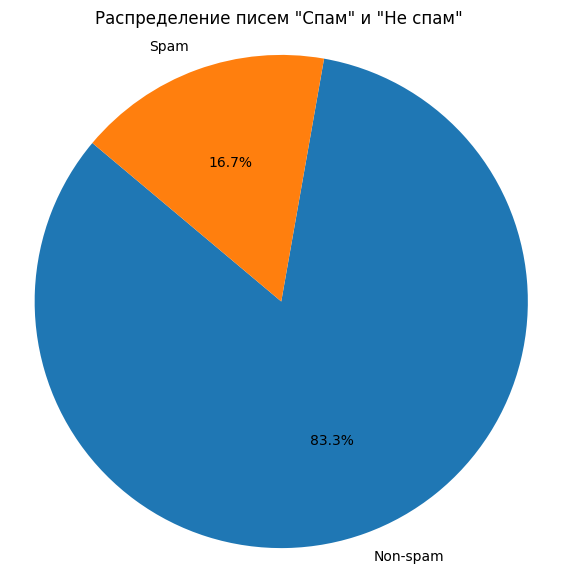

In [68]:
# визуализируйте результат: ваш код здесь

plt.figure(figsize=(7, 7))
plt.pie(list(email_data['label'].value_counts()), labels=['Non-spam', 'Spam'], autopct='%1.1f%%', startangle=140)
plt.title('Распределение писем "Спам" и "Не спам" ')
plt.axis('equal')  
plt.show()

## Задание 2 (2 балла)

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [55]:
#ваш код здесь
email_data['email'] = email_data['email'].apply(lambda x: np.nan if len(str(x).strip()) == 0 else x)
email_data.isnull().sum()

email    3
label    0
dtype: int64

In [56]:
data = email_data.dropna()

Переводим данные в векторный вид:

In [57]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [58]:
#ваш код здесь
print('Количество признаков получилось после предобработки данных: ', X.shape[1])

Количество признаков получилось после предобработки данных:  34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [59]:
#ваш код здесь
y = data['label']
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [60]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [61]:
#ваш код здесь
print('Среднее значение целевой переменной для тестовой выборки: ',  round(y_test.mean(), 3))

Среднее значение целевой переменной для тестовой выборки:  0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [62]:
# Обучение модели MultinomialNB с параметром альфа=0.01
mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [63]:

# Обучение модели ComplementNB с параметром альфа=0.01
cnb = ComplementNB(alpha=0.01)
cnb.fit(X_train, y_train)


ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [64]:
#ваш код здесь
print('Модель MultinomialNB\n', metrics.classification_report(y_test, mnb.predict(X_test), digits=3))
print('Модель ComplementNB\n', metrics.classification_report(y_test, cnb.predict(X_test), digits=3))

Модель MultinomialNB
               precision    recall  f1-score   support

           0      0.984     1.000     0.992       626
           1      1.000     0.919     0.958       124

    accuracy                          0.987       750
   macro avg      0.992     0.960     0.975       750
weighted avg      0.987     0.987     0.986       750

Модель ComplementNB
               precision    recall  f1-score   support

           0      0.986     1.000     0.993       626
           1      1.000     0.927     0.962       124

    accuracy                          0.988       750
   macro avg      0.993     0.964     0.978       750
weighted avg      0.988     0.988     0.988       750



При сравнении двух моделей MultinomialNB и ComplementNB на основе оценки метрик точности, полноты и F1-меры на тестовых данных, обнаружено, что модель ComplementNB продемонстрировала незначительное, но все же статистически значимое улучшение по сравнению с моделью MultinomialNB. Эти результаты указывают на более эффективное предсказание классов моделью ComplementNB при использовании данного набора данных.

Нарисуйте ROC-кривую:

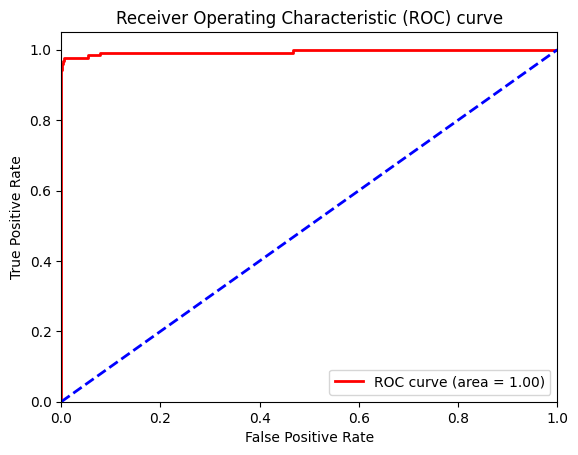

In [65]:

# Получение вероятностей предсказаний класса 1 (для бинарной классификации)
y_score = cnb.predict_proba(X_test)[:, 1]


# Вычисление ROC-кривой и площади под кривой (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


- Модель безошибочно разделяет все положительные и отрицательные случаи, что в реальных условиях может быть считаться подозрительным.
- Это может свидетельствовать о переобучении модели на обучающих данных, особенно если AUC=1 достигается при проверке на изначально использовавшихся для обучения данных.

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [66]:
# Определим диапазон значений alpha, которые хотим перебрать
alpha_values = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]

# Для каждого значения alpha выполним кросс-валидацию и оценим качество модели
for alpha in alpha_values:
    model = ComplementNB(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Средняя accuracy для alpha={alpha}: {np.mean(scores):.4f}")

Средняя accuracy для alpha=0.01: 0.9826
Средняя accuracy для alpha=0.1: 0.9830
Средняя accuracy для alpha=0.5: 0.9816
Средняя accuracy для alpha=1.0: 0.9816
Средняя accuracy для alpha=1.5: 0.9806
Средняя accuracy для alpha=2.0: 0.9800


Исходя из полученных результатов, можно сделать вывод, что изменение параметра alpha в модели ComplementNB влияет на качество классификации, хотя это влияние может быть незначительным.

В данном случае, мы видим, что значения accuracy незначительно меняются при изменении alpha от 0.01 до 1.5, и только при увеличении alpha до 2.0 происходит более значительное снижение accuracy. 

Таким образом, можно сделать вывод, что при данном наборе данных и настройках модели, изменение параметра alpha оказывает незначительное влияние на качество классификации.